In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
import yaml
from scipy.interpolate import griddata

import pickle
import os
import time

from utils.generate_data import *
from utils.sub_sampler import *
from utils.compute_barycenter import *
from utils.general_utils import *

data_path = 'data'

### Full-MCMC vs WASP

In [62]:
config_path = os.path.join('config', 'test.yaml')
with open(config_path) as f:
    config = yaml.load(f, Loader=yaml.FullLoader) 

folder_path = os.path.join(data_path, config['general']['folder_name'])
input_folder = os.path.join(folder_path, 'input')
sampling_folder = os.path.join(folder_path, 'sub-sampling')
results_folder = os.path.join(folder_path, 'results')

In [63]:
npart = 5
file_path_sol = os.path.join(results_folder, f'xsol_k{npart}.pkl')
file_path_support = os.path.join(results_folder, f'support_k{npart}.pkl')

with open(file_path_sol, 'rb') as file:
    xsol = pickle.load(file)
with open(file_path_support, 'rb') as file:
    overallPost = pickle.load(file)

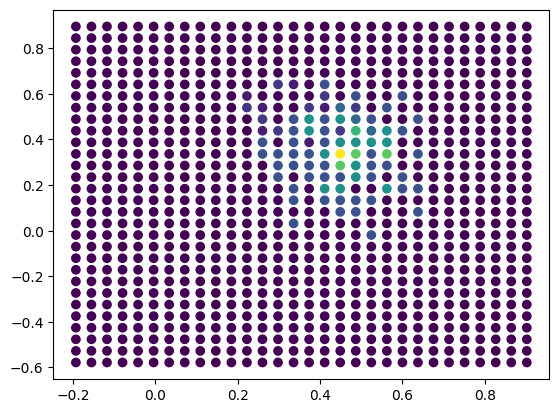

In [64]:
plt.scatter(overallPost[:, 0], overallPost[:, 1], c=xsol[:30*30])


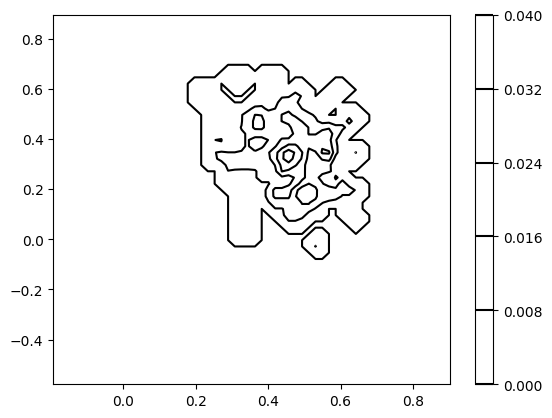

In [65]:
x, y = overallPost[:, 0], overallPost[:, 1]
z = xsol[:30*30]  # Your density or value for each point

# Create grid
xi = np.linspace(x.min(), x.max(), 60)
yi = np.linspace(y.min(), y.max(), 60)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on this grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot
plt.contour(xi, yi, zi, levels=5, colors='black')  # Adjust levels as needed
plt.colorbar()  # Show color scale
plt.show()